In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [154]:
# Datan avaus

df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

# Ensimmäisten rivien listaus

In [155]:
df.head(n=10)

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
5,6,2,31,2,2.0,14.0,1910,4,4.0,5,2,4,1.0,1.0,NaN,NaN
6,7,1,49,1,2.0,16.0,2066,3,5.0,4,2,2,NaN,NaN,1.0,NaN
7,8,1,55,1,1.0,0.0,2066,3,5.0,3,1,3,1.0,NaN,NaN,NaN
8,9,1,40,2,1.0,23.0,2768,2,4.0,4,2,4,NaN,1.0,NaN,NaN
9,10,1,33,1,1.0,16.0,2106,3,2.0,1,1,1,1.0,NaN,NaN,NaN


# Slicing example below

In [156]:
df.iloc[:,[4,5]]

,education,years_of_service
0,1.0,22.0
1,2.0,10.0
2,1.0,7.0
3,1.0,14.0
4,2.0,4.0
...,...,...
77,3.0,0.0
78,1.0,2.0
79,2.0,7.0
80,2.0,16.0


In [157]:
df.isnull().sum()

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

In [159]:
df['years_of_service'].unique()

array([22., 10.,  7., 14.,  4., 16.,  0., 23., 21., 15., 12.,  2., 17.,
       20., 13., 27.,  1.,  3., nan, 24.,  5.,  9.,  6., 35., 28., 18.,
       36., 19.,  8.])

*Here we found out nan values

In [160]:
df['education'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [161]:
df.duplicated().sum()

0

In [162]:
df.isnull().sum()

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

* We found out one unique value in education as nan, means one case has no education
* This also applies to the two values found in years_of_service meaning 2 cases have no years of service


In [163]:
df=df.drop(columns=['holidayCabin', 'muscleCare','gym' , 'healtcare'])
# Datan poisto mitä ei käytetä analyysissä


In [164]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


# Muuttujien summarointi

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               81 non-null     float64
 5   years_of_service        80 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           81 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
dtypes: float64(3), int64(9)
memory usage: 7.8 KB


In [166]:
df[      ['education', 'years_of_service']     ].describe()

,education,years_of_service
count,81.000000,80.000000
mean,1.987654,12.175000
std,0.844006,8.807038
min,1.000000,0.000000
25%,1.000000,3.750000
50%,2.000000,12.500000
75%,3.000000,18.250000
max,4.000000,36.000000


Text(0.5, 0, 'Education levels, n=81')

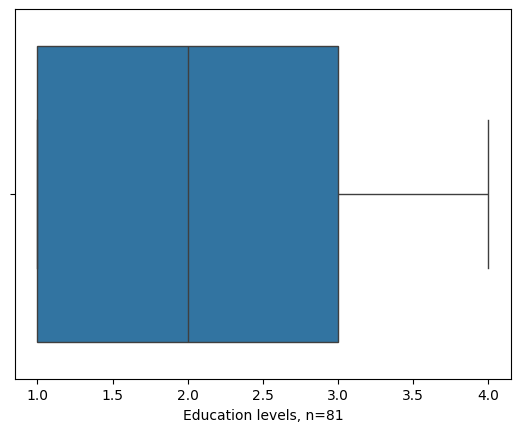

In [167]:
ax3 = sns.boxplot(x = df['education'])

ax3.set_xlabel('Education levels, n=' + str(df['education'].count()))

In [168]:
df.count()

number                    82
gender                    82
age                       82
family                    82
education                 81
years_of_service          80
salary                    82
sat_management            82
sat_colleques             81
sat_workingEnvironment    82
sat_salary                82
sat_tasks                 82
dtype: int64

In [169]:
for var in df:
    print(var, df[var].unique())

number [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82]
gender [1 2]
age [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
family [1 2]
education [ 1.  2.  3.  4. nan]
years_of_service [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 nan 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]
salary [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
sat_management [3 1 2 4 5]
sat_colleques [ 3.  5.  4.  2. nan]
sat_workingEnvironment [3 2 1 5 4]
sat_salary [3 1 2 4 5]
sat_tasks [3 2 4 1 5]


# Alkutoimet loppuu

# Luokittelevan muuttujan analysointi (Education)

In [170]:
df1=pd.crosstab(df['education'], 'Count')
df1

col_0,Count
education,
1.0,27
2.0,30
3.0,22
4.0,2


In [171]:
df1.index=['Primary school','Secondary School Graduate','Bachelor','Master']
df1.columns.name=''
df1

,Count
Primary school,27
Secondary School Graduate,30
Bachelor,22
Master,2


# Graafit Education muuttujalle

* Muuttuja education on ordinaalinen muuttuja koska sillä voi olla useita arvoja, jotka voidaan järjestää järjestykseen

<Axes: >

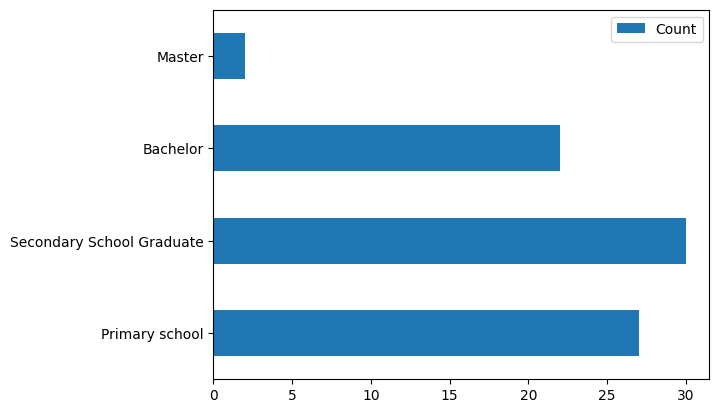

In [172]:
df1.plot.barh()

Text(0.5, 0, 'Count, N=102')

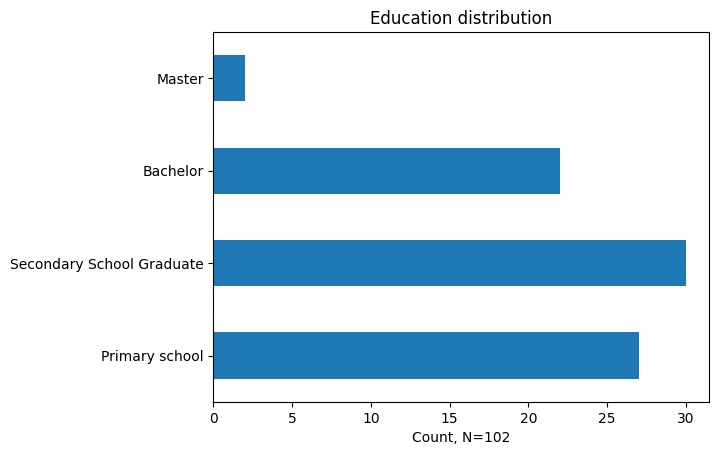

In [173]:
df1.plot.barh(legend = False)

plt.title('Education distribution')
plt.xlabel('Count, N=102')

* Percentual

In [174]:
df2 = pd.crosstab(df['education'], 'Count')
df2['%'] = df2['Count'] / df2['Count'].sum() * 100
df2.index = ['Primary school','Secondary School Graduate','Bachelor','Master' ]
df2.columns.name = ''
df2

,Count,%
Primary school,27,33.333333
Secondary School Graduate,30,37.037037
Bachelor,22,27.160494
Master,2,2.469136


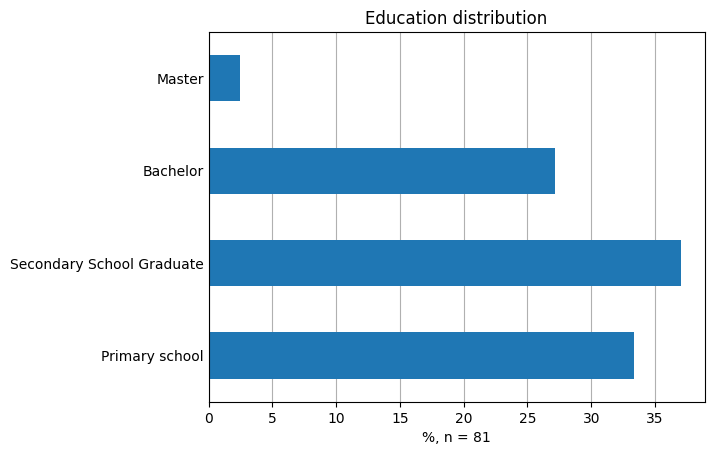

In [175]:
df2['%'].plot.barh(zorder = 2)

plt.title('Education distribution')

plt.xlabel('%, n = ' + str(df2['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

# Percentual pie chart of education distribution in the company for better readability

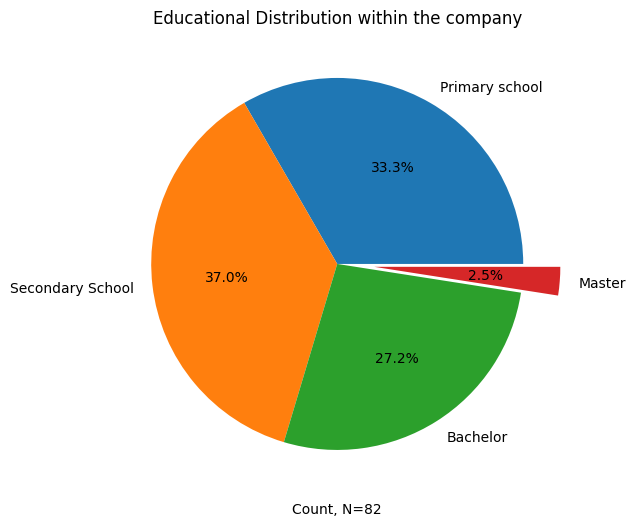

In [176]:
education = ['Primary school','Secondary School','Bachelor','Master' ]
levels = ['27', '30', '22', '2']
plt.figure(figsize=(6,10))

plt.pie(levels, labels=education, startangle=0, explode=[0,0,0,0.2], autopct="%1.1f%%")
plt.title("Educational Distribution within the company")
plt.xlabel('Count, N=82')
plt.show()

# Numeerisen muuttujan analysointi (Years of Service)

In [177]:
df[      ['years_of_service']     ].describe()

,years_of_service
count,80.000000
mean,12.175000
std,8.807038
min,0.000000
25%,3.750000
50%,12.500000
75%,18.250000
max,36.000000


In [178]:
bins = [0,5,10,15,20,25,30,35,40,45]

In [179]:
df['Years'] = pd.cut(df['years_of_service'], bins = bins)
df

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,Years
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,"(20.0, 25.0]"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,"(5.0, 10.0]"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,"(5.0, 10.0]"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,"(10.0, 15.0]"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,"(0.0, 5.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,"(0.0, 5.0]"
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,"(5.0, 10.0]"
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,"(15.0, 20.0]"


In [180]:
df3 = pd.crosstab(df['years_of_service'], 'Count')

df3.columns.name = ''

# Percentages
n = df3['Count'].sum()
df3['%'] = df3 / n * 100
df3

,Count,%
years_of_service,,
0.0,4,5.00
1.0,9,11.25
2.0,4,5.00
3.0,3,3.75
4.0,1,1.25
5.0,1,1.25
6.0,2,2.50
7.0,7,8.75
8.0,1,1.25


In [181]:
type(df3.index.values[0])

numpy.float64

In [182]:
df3.index = df3.index.astype(str)
df3.loc['Total'] = df3.sum()
df3

,Count,%
years_of_service,,
0.0,4.0,5.00
1.0,9.0,11.25
2.0,4.0,5.00
3.0,3.0,3.75
4.0,1.0,1.25
5.0,1.0,1.25
6.0,2.0,2.50
7.0,7.0,8.75
8.0,1.0,1.25


In [183]:
df3.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

,Count,%
years_of_service,,
0.0,4,5.0 %
1.0,9,11.2 %
2.0,4,5.0 %
3.0,3,3.8 %
4.0,1,1.2 %
5.0,1,1.2 %
6.0,2,2.5 %
7.0,7,8.8 %
8.0,1,1.2 %


Text(0, 0.5, 'Frequency')

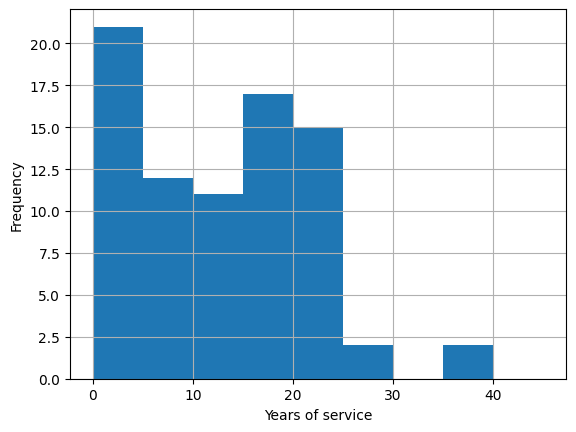

In [184]:
df['years_of_service'].hist(bins = bins)

plt.xlabel('Years of service')
plt.ylabel('Frequency')

# Kahden muuttujan analysointia

In [207]:
df4 = pd.crosstab(df['education'], df['gender'], normalize = 'columns') * 100
df4.index = ['Primary school','Secondary School','Bachelor','Master' ]
df4.columns = ['Female', 'Male']
df4

,Female,Male
Primary school,35.483871,26.315789
Secondary School,37.096774,36.842105
Bachelor,24.193548,36.842105
Master,3.225806,0.000000


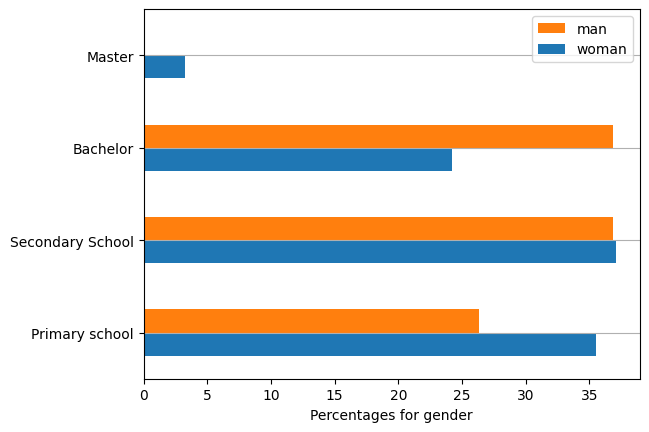

In [206]:
df4.plot.barh(legend = 'reverse')

plt.xlabel('Percentages for gender')

plt.grid(axis = 'y')

In [215]:
df6 = pd.crosstab(df['education'], df['gender'])
df6.index = ['Primary school','Secondary School','Bachelor','Master' ]
df6.columns = ['Female', 'Male']

In [216]:
from scipy.stats import chi2_contingency


chi2_contingency(df6)

Chi2ContingencyResult(statistic=1.836533415650563, pvalue=0.6070173075042058, dof=3, expected_freq=array([[20.66666667,  6.33333333],
       [22.96296296,  7.03703704],
       [16.83950617,  5.16049383],
       [ 1.5308642 ,  0.4691358 ]]))

# Teoriat loppuun kysymyksiin liittyen joihin haluttiin vastaus

<h4> Keyword Arguments 

* Ovat Pythonissa arvoja, jotka välitetään funktiolle nimen avulla. Eroaa tavallisista argumenteista sillä että niiden ei tarvitse olla samassa järjestyksessä kuin funktion määrittelyssä.

<h4> List Comprehension


In [185]:
luvut = [1, 2, 3, 4, 5]

neliöluvut = [x * x for x in luvut]

print(neliöluvut)

[1, 4, 9, 16, 25]


* luvut listaa käytetään uuden listan nimeltä neliöluvut listan luontiin. luvut iteroidaan luvut listan yli ja arvot neliöidään

<h4> Kolmio esimerkki

In [188]:
import random
def calculate_points(n=100, n_vertices=3):

    x_points=[0]
    y_points=[0]
    
    x_vertices=[np.sin((2*k*np.pi)/n_vertices) for k in range(0,n_vertices)]
    y_vertices=[np.cos((2*k*np.pi)/n_vertices) for k in range(0,n_vertices)]
    
    for item in range(0,n):
        r=random.randint(1, n_vertices)-1
        x_points.append((x_vertices[r]+x_points[-1])/2)
        y_points.append((y_vertices[r]+y_points[-1])/2)

    plt.figure(figsize=(6, 6))
    plt.axis('equal')
    plt.scatter(x_points, y_points, color='k', s=.001);
    plt.show()

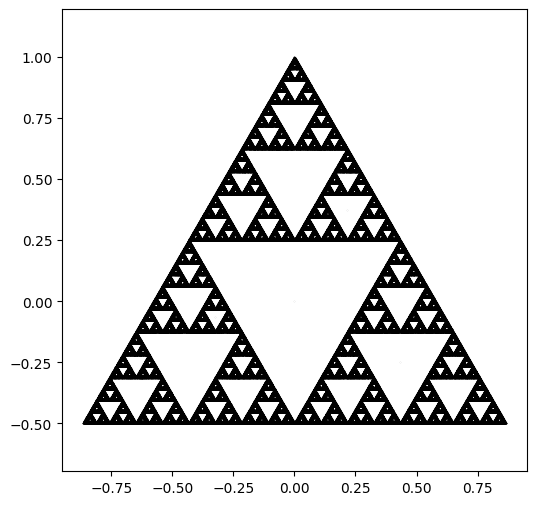

In [189]:
calculate_points(n=1000000, n_vertices=3);

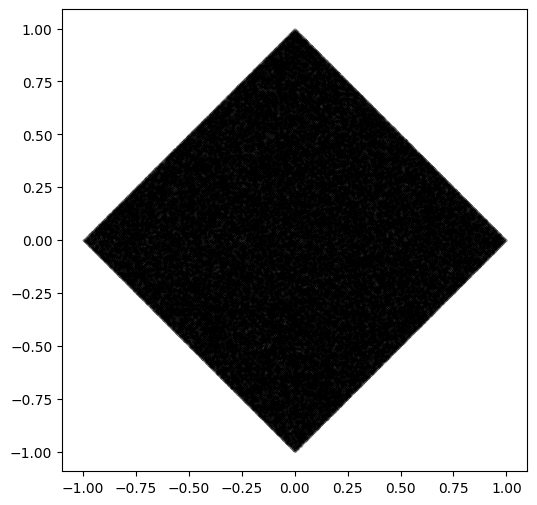

In [190]:
calculate_points(n=1000000, n_vertices=4);

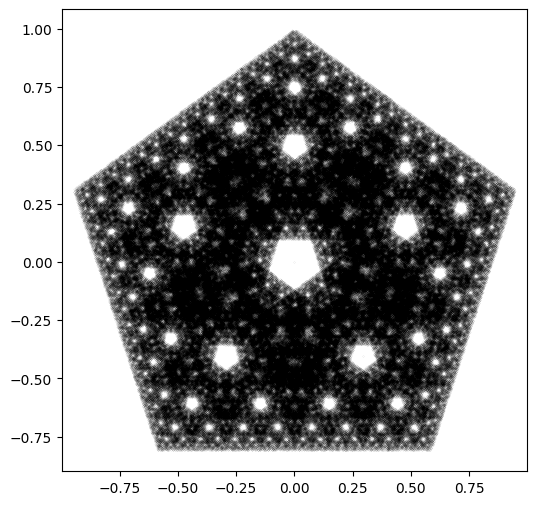

In [191]:
calculate_points(n=1000000, n_vertices=5);

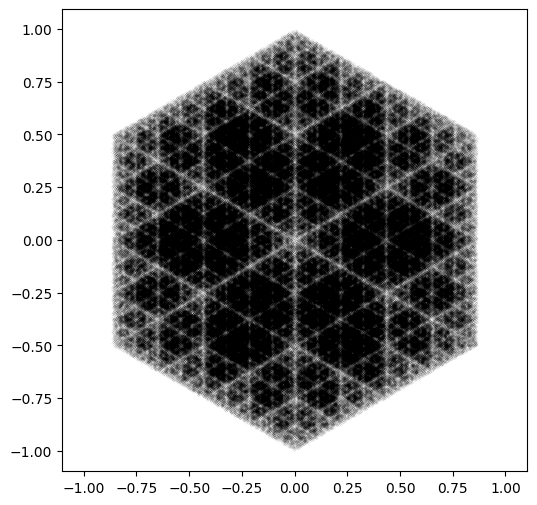

In [192]:
calculate_points(n=1000000, n_vertices=6);

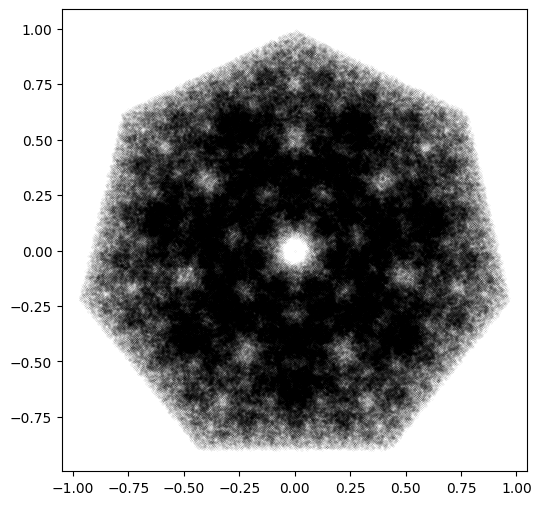

In [193]:
calculate_points(n=1000000, n_vertices=7);

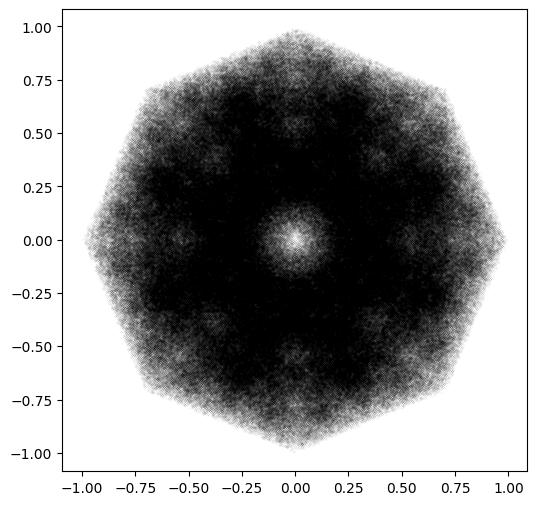

In [194]:
calculate_points(n=1000000, n_vertices=8);

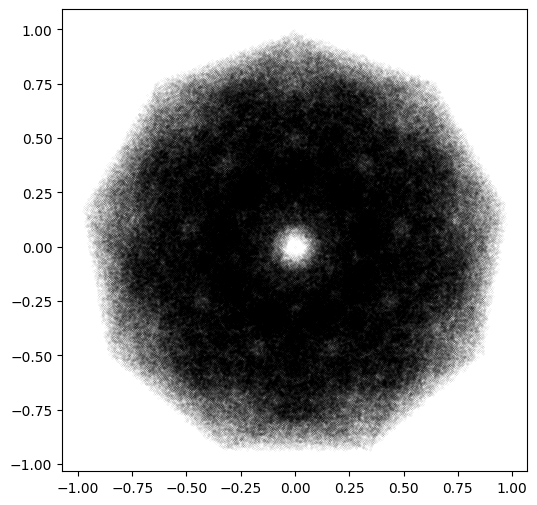

In [195]:
calculate_points(n=1000000, n_vertices=9);

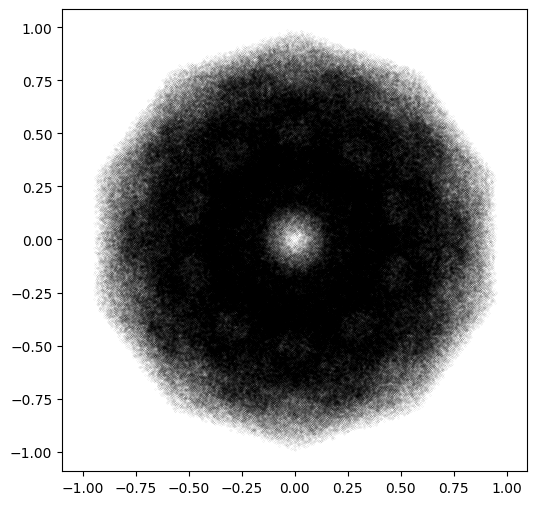

In [196]:
calculate_points(n=1000000, n_vertices=10);